In [1]:
## Data: https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset


## Additional Information

# This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.  

# Any patient whose age exceeded 89 is listed as being of age "90".

In [2]:
# Additional Information

# 1.   Age		Age of the patient
# 2.   Gender		Gender of the patient
# 3.   TB			Total Bilirubin
# 4.   DB		 	Direct Bilirubin
# 5.   Alkphos 		Alkaline Phosphotase
# 6.   Sgpt 		Alamine Aminotransferase
# 7.   Sgot 		Aspartate Aminotransferase
# 8.   TP			Total Protiens
# 9.   ALB		Albumin
# 10. A/G Ratio		Albumin and Globulin Ratio
# 11. Selector field used to split the data into two sets (labeled by the experts)

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve  
from sklearn.preprocessing import binarize
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

In [4]:
raw_data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [5]:
raw_data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [6]:
raw_data.columns = ["Age","Gender","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G Ratio","Group"]
raw_data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Group
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [7]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,582.0,44.711340,16.181921,4.0,33.00,45.00,57.75,90.0
TB,582.0,3.303265,6.213926,0.4,0.80,1.00,2.60,75.0
DB,582.0,1.488488,2.810324,0.1,0.20,0.30,1.30,19.7
Alkphos,582.0,290.754296,243.108929,63.0,175.25,208.00,298.00,2110.0
Sgpt,582.0,80.824742,182.757696,10.0,23.00,35.00,60.75,2000.0
Sgot,582.0,110.068729,289.141876,10.0,25.00,42.00,87.00,4929.0
TP,582.0,6.482646,1.086306,2.7,5.80,6.60,7.20,9.6
ALB,582.0,3.141581,0.796176,0.9,2.60,3.10,3.80,5.5
A/G Ratio,578.0,0.947145,0.319863,0.3,0.70,0.94,1.10,2.8
Group,582.0,1.286942,0.452723,1.0,1.00,1.00,2.00,2.0


In [8]:
## only 578 count for A/G Ratio, maybe missing data

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        582 non-null    int64  
 1   Gender     582 non-null    object 
 2   TB         582 non-null    float64
 3   DB         582 non-null    float64
 4   Alkphos    582 non-null    int64  
 5   Sgpt       582 non-null    int64  
 6   Sgot       582 non-null    int64  
 7   TP         582 non-null    float64
 8   ALB        582 non-null    float64
 9   A/G Ratio  578 non-null    float64
 10  Group      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [10]:
raw_data.shape

(582, 11)

In [11]:
## check if there are any missing values

In [12]:
raw_data.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Group        0
dtype: int64

In [13]:
## display rows with missing values

In [14]:
raw_data[raw_data.isnull().any(axis=1)]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Group
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [15]:
## From above, A/G Ratio mean is 0.947145 and median is 0.940000
## since there are only 4 rows out of 582 rows with null values, we will drop those 4 rows

In [16]:
df = raw_data.dropna()
df.shape

(578, 11)

In [17]:
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Group        0
dtype: int64

In [18]:
## Check duplicate

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
577    False
578    False
579    False
580    False
581    False
Length: 578, dtype: bool

In [20]:
## show duplicated records  
duplicated = df[df.duplicated(keep = False)]
duplicated

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Group
17,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
24,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
32,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
53,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
60,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [21]:
## remove duplicated records
df1 = df.drop_duplicates()

In [22]:
df1.shape

(565, 11)

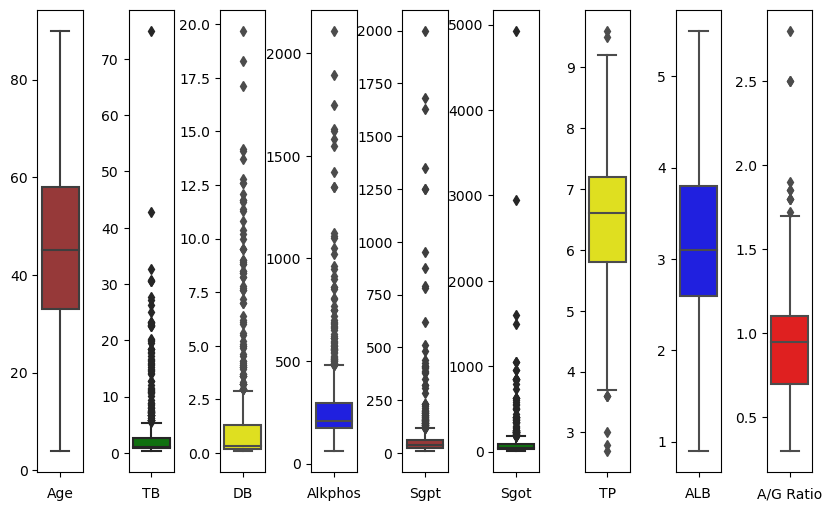

In [23]:
## check for outlier using boxplots

fig, ax = plt.subplots(1, 9, figsize=(10, 6))

plt.subplots_adjust(wspace=1) 

sns.boxplot(data=df1['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Age')

sns.boxplot(data=df1['TB'], ax=ax[1], color='green')
ax[1].set_xlabel('TB')

sns.boxplot(data=df1['DB'], ax=ax[2], color='yellow')
ax[2].set_xlabel('DB')

sns.boxplot(data=df1['Alkphos'], ax=ax[3],color='blue')
ax[3].set_xlabel('Alkphos')

sns.boxplot(data=df1['Sgpt'], ax=ax[4], color='brown')
ax[4].set_xlabel('Sgpt')

sns.boxplot(data=df1['Sgot'], ax=ax[5], color='green')
ax[5].set_xlabel('Sgot')

sns.boxplot(data=df1['TP'], ax=ax[6], color='yellow')
ax[6].set_xlabel('TP')

sns.boxplot(data=df1['ALB'], ax=ax[7],color='blue')
ax[7].set_xlabel('ALB')

sns.boxplot(data=df1['A/G Ratio'], ax=ax[8], color='red')
ax[8].set_xlabel('A/G Ratio')


for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

In [24]:
df1["Gender"].value_counts()

Male      428
Female    137
Name: Gender, dtype: int64

In [25]:
df1["Group"].value_counts()

1    403
2    162
Name: Group, dtype: int64

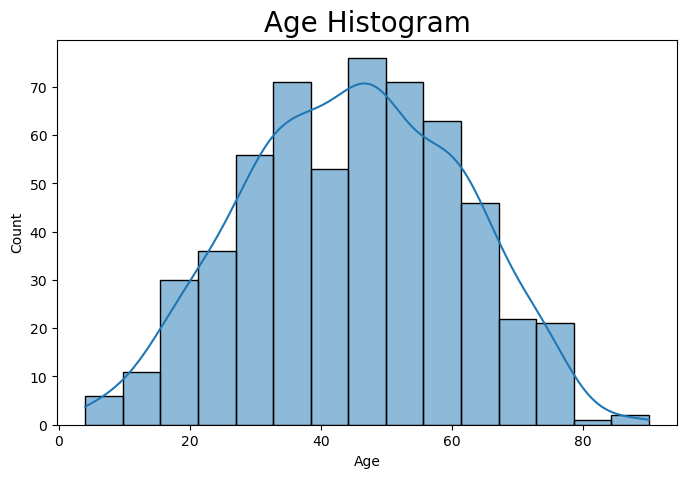

In [26]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = df1["Age"], kde= True)
plt.title("Age Histogram", fontsize = 20)
plt.show()

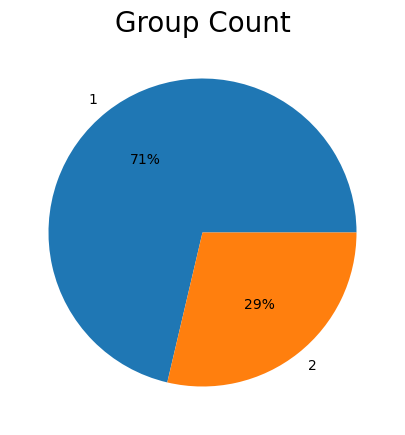

In [27]:
plt.figure(figsize = (8,5))
vc = df1["Group"].value_counts()
labels = vc.index
plt.pie(vc,labels = labels, autopct='%.0f%%')
plt.title("Group Count", fontsize = 20)
plt.show()

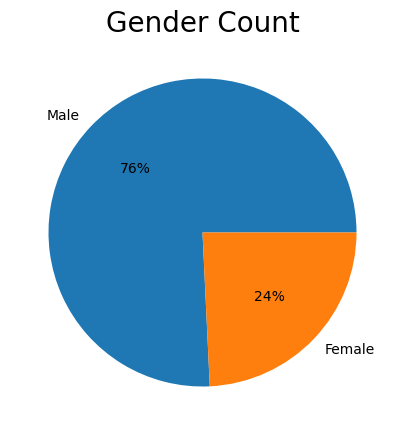

In [28]:
plt.figure(figsize = (8,5))
vc = df1["Gender"].value_counts()
labels = vc.index
plt.pie(vc,labels = labels, autopct='%.0f%%')
plt.title("Gender Count", fontsize = 20)
plt.show()

Text(0.5, 0.98, 'Group by Gender and Age')

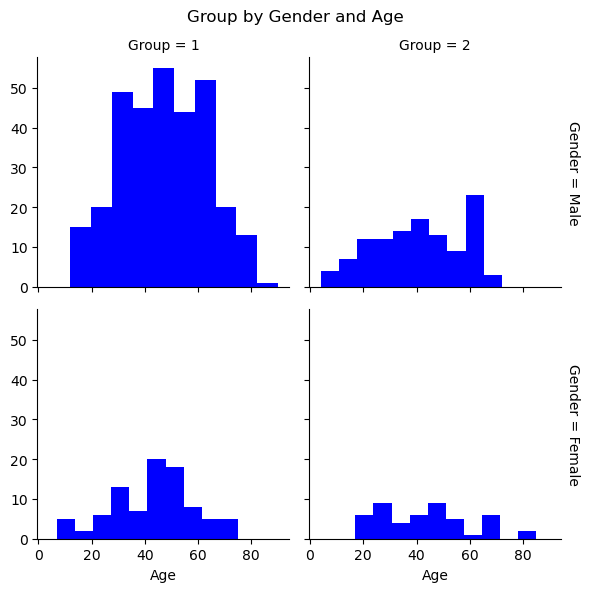

In [29]:
g = sns.FacetGrid(df1, col="Group", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Group by Gender and Age')

In [30]:
df1.corr()

/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Group
Age,1.000000,0.011641,0.007364,0.081148,-0.083669,-0.016686,-0.196788,-0.270248,-0.215934,-0.132662
TB,0.011641,1.000000,0.873933,0.205032,0.216572,0.237990,-0.008216,-0.223877,-0.207889,-0.225053
DB,0.007364,0.873933,1.000000,0.233365,0.236499,0.257767,-0.000489,-0.230538,-0.201698,-0.251624
Alkphos,0.081148,0.205032,0.233365,1.000000,0.125683,0.166412,-0.028416,-0.166172,-0.236408,-0.186635
Sgpt,-0.083669,0.216572,0.236499,0.125683,1.000000,0.791714,-0.034935,-0.026773,-0.006620,-0.162087
Sgot,-0.016686,0.237990,0.257767,0.166412,0.791714,1.000000,-0.021961,-0.084723,-0.072991,-0.151429
TP,-0.196788,-0.008216,-0.000489,-0.028416,-0.034935,-0.021961,1.000000,0.783785,0.234671,0.036773
ALB,-0.270248,-0.223877,-0.230538,-0.166172,-0.026773,-0.084723,0.783785,1.000000,0.687526,0.165555
A/G Ratio,-0.215934,-0.207889,-0.201698,-0.236408,-0.006620,-0.072991,0.234671,0.687526,1.000000,0.171298
Group,-0.132662,-0.225053,-0.251624,-0.186635,-0.162087,-0.151429,0.036773,0.165555,0.171298,1.000000


/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/1829254849.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot = True)


<Axes: >

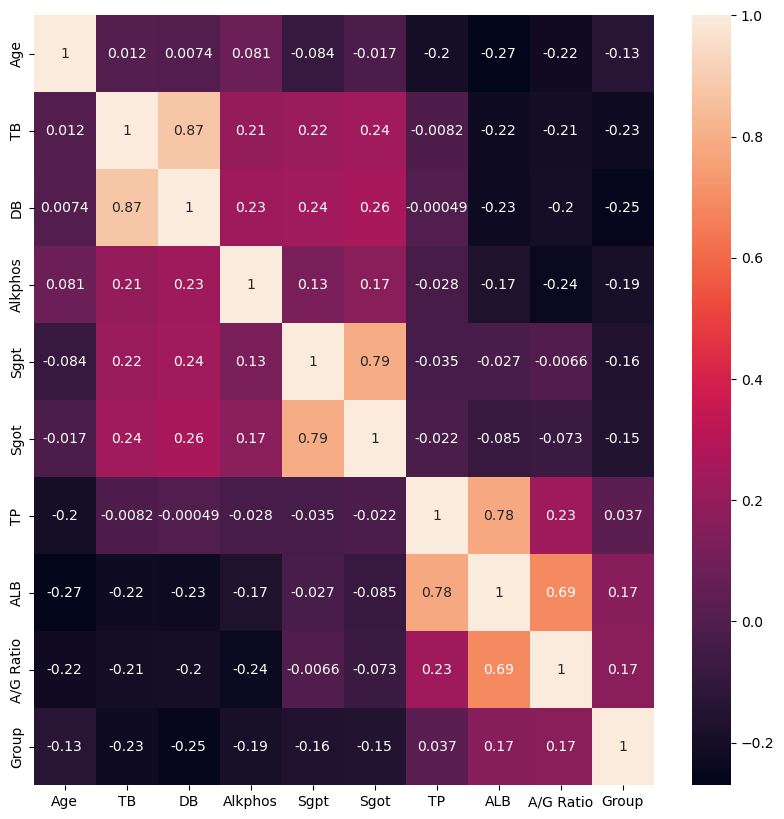

In [31]:
plt.subplots(figsize = (10, 10))
sns.heatmap(df1.corr(), annot = True)

In [32]:
df1["AgeGroup"] = ["Below 10" if 0 < age < 10 
                  else "10 - 19" if 10 <= age < 19 
                  else "20 - 29" if 20 <= age < 29
                  else "30 - 39" if 30 <= age < 39
                  else "40 - 49" if 40 <= age < 49
                  else "50 - 59" if 50 <= age < 59
                  else "60 - 69" if 60 <= age < 69
                  else "70 - 79" if 70 <= age < 79
                  else "80 - 89" if 80 <= age < 89
                  else "Above 90"
                  for age in df1["Age"]
                 ]

/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/896270711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["AgeGroup"] = ["Below 10" if 0 < age < 10


In [33]:
df1["AgeGroup"].value_counts()

40 - 49     114
30 - 39     107
50 - 59      95
60 - 69      89
20 - 29      59
70 - 79      37
10 - 19      29
Above 90     27
Below 10      6
80 - 89       2
Name: AgeGroup, dtype: int64

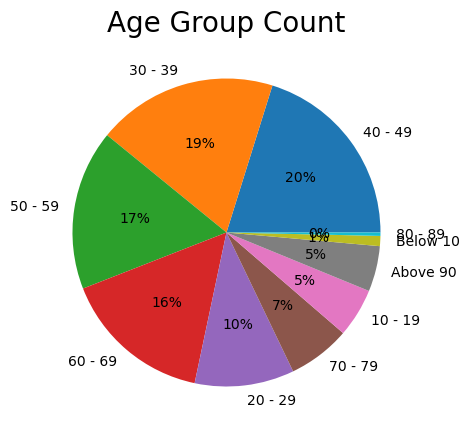

In [34]:
plt.figure(figsize = (8,5))
vc = df1["AgeGroup"].value_counts()
labels = vc.index
plt.pie(vc, labels = labels,  autopct='%.0f%%')
plt.title("Age Group Count", fontsize = 20)
plt.show()

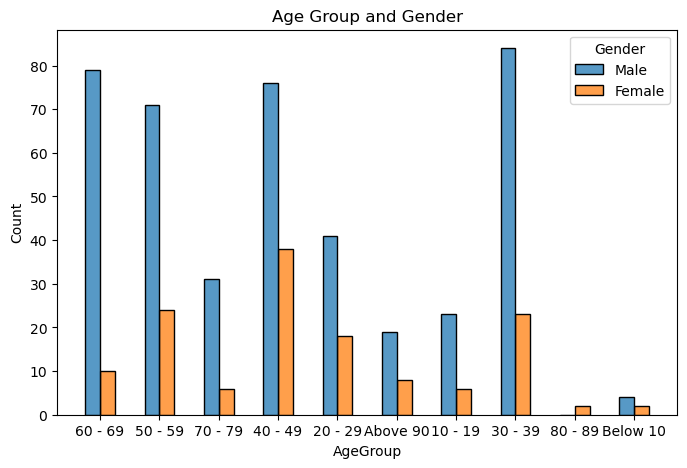

In [35]:
plt.subplots(figsize=(8, 5))

a = sns.histplot(data=df, x=df1["AgeGroup"], hue=df1["Gender"], multiple="dodge", shrink=.5).set(title='Age Group and Gender')


In [36]:
## Focus on patients with Liver cancer, which is Group 1

In [37]:
Group_One = df1[df1["Group"]==1]
Group_One

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Group,AgeGroup
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,60 - 69
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,60 - 69
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,50 - 59
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,70 - 79
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1,40 - 49
...,...,...,...,...,...,...,...,...,...,...,...,...
575,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1,30 - 39
576,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1,30 - 39
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,40 - 49
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,50 - 59


In [38]:
Group_One.shape

(403, 12)

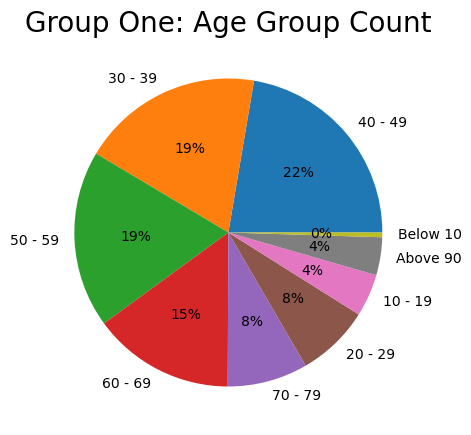

In [39]:
plt.figure(figsize = (8,5))
vc = Group_One["AgeGroup"].value_counts()
labels = vc.index
plt.pie(vc, labels = labels, autopct='%.0f%%')
plt.title("Group One: Age Group Count", fontsize = 20)
plt.show()

In [40]:
## Age from 30 - 69 have higher percentage of liver cancer

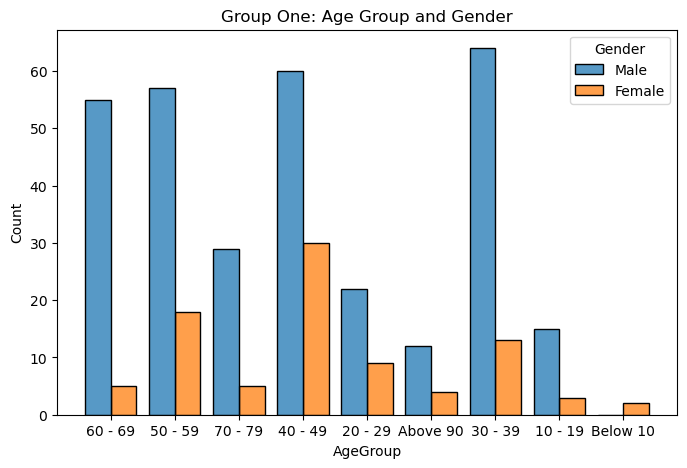

In [41]:
plt.subplots(figsize=(8, 5))

a = sns.histplot(data=Group_One, x=Group_One["AgeGroup"], hue=Group_One["Gender"], multiple="dodge",  shrink=.8).set(title='Group One: Age Group and Gender')

In [42]:
## Replace male and female to 0 and 1

df1.replace(to_replace = "Female" , value = 1 , inplace = True)
df1.replace(to_replace = "Male" , value = 0 , inplace = True)

/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/836218159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace(to_replace = "Female" , value = 1 , inplace = True)
/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/836218159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace(to_replace = "Male" , value = 0 , inplace = True)


In [43]:
df1.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Group,AgeGroup
0,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,60 - 69
1,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1,60 - 69
2,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1,50 - 59
3,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1,70 - 79
4,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1,40 - 49


In [44]:
df1.shape

(565, 12)

In [45]:
X = df1.drop(['Group','AgeGroup'], axis=1)
X

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
1,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
2,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
3,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
4,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30
...,...,...,...,...,...,...,...,...,...,...
577,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
578,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
579,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
580,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [46]:
X.corr()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
Age,1.000000,-0.061650,0.011641,0.007364,0.081148,-0.083669,-0.016686,-0.196788,-0.270248,-0.215934
Gender,-0.061650,1.000000,-0.088014,-0.099198,0.026295,-0.082473,-0.079837,0.091432,0.092860,0.006097
TB,0.011641,-0.088014,1.000000,0.873933,0.205032,0.216572,0.237990,-0.008216,-0.223877,-0.207889
DB,0.007364,-0.099198,0.873933,1.000000,0.233365,0.236499,0.257767,-0.000489,-0.230538,-0.201698
Alkphos,0.081148,0.026295,0.205032,0.233365,1.000000,0.125683,0.166412,-0.028416,-0.166172,-0.236408
Sgpt,-0.083669,-0.082473,0.216572,0.236499,0.125683,1.000000,0.791714,-0.034935,-0.026773,-0.006620
Sgot,-0.016686,-0.079837,0.237990,0.257767,0.166412,0.791714,1.000000,-0.021961,-0.084723,-0.072991
TP,-0.196788,0.091432,-0.008216,-0.000489,-0.028416,-0.034935,-0.021961,1.000000,0.783785,0.234671
ALB,-0.270248,0.092860,-0.223877,-0.230538,-0.166172,-0.026773,-0.084723,0.783785,1.000000,0.687526
A/G Ratio,-0.215934,0.006097,-0.207889,-0.201698,-0.236408,-0.006620,-0.072991,0.234671,0.687526,1.000000


<Axes: >

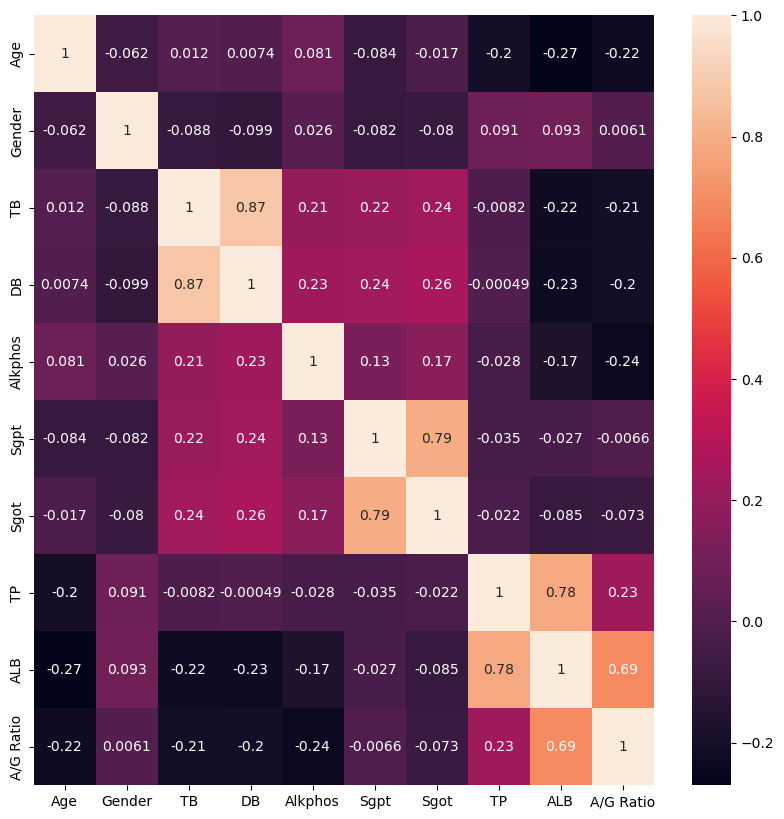

In [47]:
plt.subplots(figsize = (10, 10))
sns.heatmap(X.corr(), annot = True)

In [48]:
## DB has high correlation with TB (.87)
## Sgot has high correlation with Sgpt (.79)
## ALB has high correlation with TP (.78)

In [49]:
df1['Group'][df1['Group'] == 1] = 1
df1['Group'][df1['Group'] == 2] = 0

/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/444870444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Group'][df1['Group'] == 1] = 1
/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/444870444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Group'][df1['Group'] == 1] = 1
/var/folders/pb/4fttdfdd36zd69x5tsjgf6sr0000gn/T/ipykernel_43828/444870444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [50]:
y = df1['Group']
y

0      1
1      1
2      1
3      1
4      1
      ..
577    0
578    1
579    1
580    1
581    0
Name: Group, Length: 565, dtype: int64

In [51]:
## Transform y values
## Group 1: 0; Group 2: 1

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [52]:
## split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
X_train.shape

(395, 10)

In [54]:
X_test.shape

(170, 10)

In [55]:
X_train

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
542,40,0,1.2,0.6,204,23,27,7.6,4.0,1.10
519,62,0,1.8,0.9,224,69,155,8.6,4.0,0.80
323,60,0,2.6,1.2,171,42,37,5.4,2.7,1.00
392,41,0,2.7,1.3,580,142,68,8.0,4.0,1.00
536,10,1,0.8,0.1,395,25,75,7.6,3.6,0.90
...,...,...,...,...,...,...,...,...,...,...
136,18,0,0.8,0.2,282,72,140,5.5,2.5,0.80
153,34,0,5.9,2.5,290,45,233,5.6,2.7,0.90
77,70,0,1.4,0.6,146,12,24,6.2,3.8,1.58
250,33,0,0.9,0.8,680,37,40,5.9,2.6,0.80


In [56]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [57]:
## Logistic Regression Model

In [58]:
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

/Users/zhanman/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [59]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [60]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[ 10  39]
 [ 12 109]]


<Axes: >

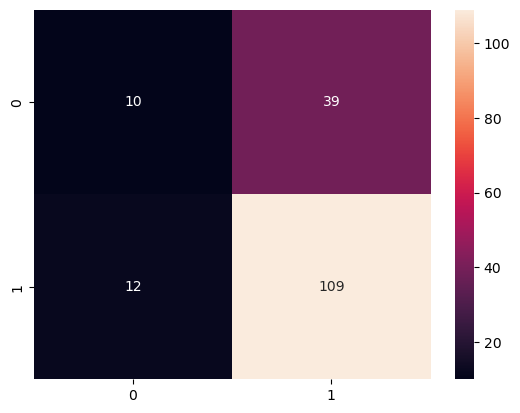

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d')

In [62]:
target_names = ['Group 1', 'Group 2']
print('Classification Report: \n', classification_report(y_test,y_pred, target_names=target_names))

Classification Report: 
               precision    recall  f1-score   support

     Group 1       0.45      0.20      0.28        49
     Group 2       0.74      0.90      0.81       121

    accuracy                           0.70       170
   macro avg       0.60      0.55      0.55       170
weighted avg       0.66      0.70      0.66       170



In [63]:
## classification rate is 70%
## Precision: 74% (model could predict a patient with disease with 74%)
## Recall: 90% 
## F1 score: 0.81 (great prediction model)

In [64]:
## ROC curve and optimal threshold value

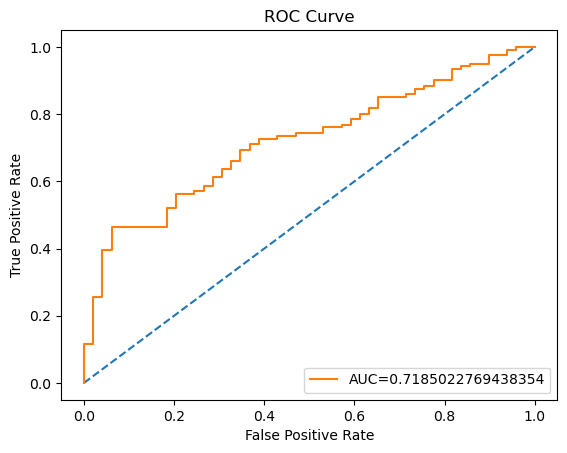

In [65]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [66]:
## feature selection

In [67]:
## measure the dependency between variables
mutual_info = mutual_info_classif(X, y, random_state = 3)
mutual_info

array([0.06250375, 0.00770194, 0.07830852, 0.07727406, 0.02842409,
       0.08781914, 0.09075378, 0.        , 0.        , 0.05528949])

<Axes: >

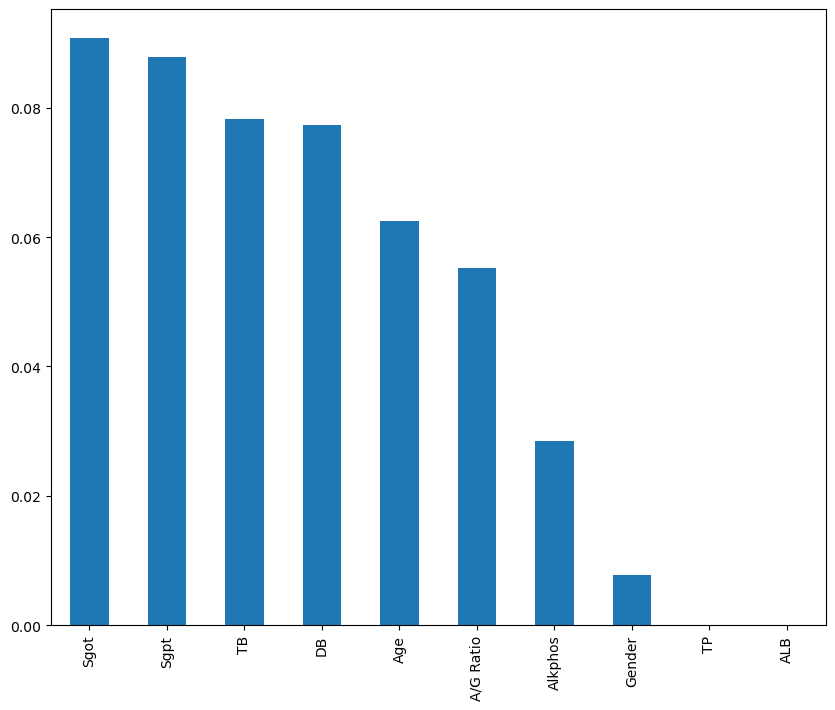

In [68]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 8))

In [69]:
mutual_info

Age          0.062504
Gender       0.007702
TB           0.078309
DB           0.077274
Alkphos      0.028424
Sgpt         0.087819
Sgot         0.090754
TP           0.000000
ALB          0.000000
A/G Ratio    0.055289
dtype: float64

In [70]:
## Model with top 6 features

select_six = SelectKBest(mutual_info_classif, k=6)
print(select_six)

SelectKBest(k=6, score_func=<function mutual_info_classif at 0x121159000>)


In [71]:
select_six.fit(X,y)

SelectKBest(k=6, score_func=<function mutual_info_classif at 0x121159000>)

In [72]:
print(select_six.get_support())

[ True False  True  True False  True  True False  True False]


In [73]:
print(select_six.get_feature_names_out())

['Age' 'TB' 'DB' 'Sgpt' 'Sgot' 'ALB']


In [74]:
X6 = df1.drop(['Group','AgeGroup'], axis=1)
X6

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
1,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
2,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
3,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
4,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30
...,...,...,...,...,...,...,...,...,...,...
577,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
578,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
579,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
580,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [75]:
X6_drop = [X6.columns[i] for i, x in enumerate(select_six.get_support()) if not x]
X6_drop

['Gender', 'Alkphos', 'TP', 'A/G Ratio']

In [76]:
X6 = X6.drop((X6_drop), axis = 1)
X6

,Age,TB,DB,Sgpt,Sgot,ALB
0,62,10.9,5.5,64,100,3.2
1,62,7.3,4.1,60,68,3.3
2,58,1.0,0.4,14,20,3.4
3,72,3.9,2.0,27,59,2.4
4,46,1.8,0.7,19,14,4.4
...,...,...,...,...,...,...
577,60,0.5,0.1,20,34,1.6
578,40,0.6,0.1,35,31,3.2
579,52,0.8,0.2,48,49,3.2
580,31,1.3,0.5,29,32,3.4


In [77]:
# split data

X6_train, X6_test, y_train, y_test = train_test_split(X6, y, test_size=0.3, random_state=1)

In [78]:
X6_train

,Age,TB,DB,Sgpt,Sgot,ALB
542,40,1.2,0.6,23,27,4.0
519,62,1.8,0.9,69,155,4.0
323,60,2.6,1.2,42,37,2.7
392,41,2.7,1.3,142,68,4.0
536,10,0.8,0.1,25,75,3.6
...,...,...,...,...,...,...
136,18,0.8,0.2,72,140,2.5
153,34,5.9,2.5,45,233,2.7
77,70,1.4,0.6,12,24,3.8
250,33,0.9,0.8,37,40,2.6


In [79]:
logreg.fit(X6_train, y_train)

LogisticRegression(random_state=1)

In [80]:
y_pred_X6 = logreg.predict(X6_test)
y_pred_X6

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [81]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred_X6))

Confusion Matrix: 
 [[  8  41]
 [  9 112]]


<Axes: >

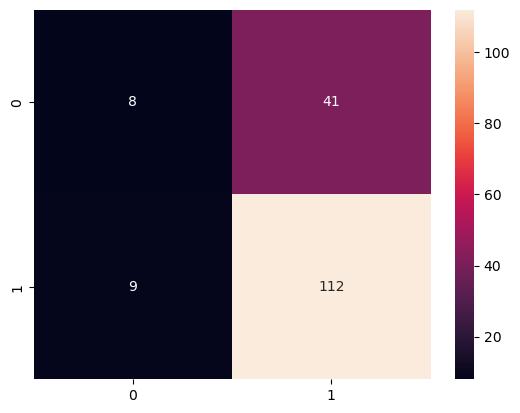

In [82]:
sns.heatmap(confusion_matrix(y_test,y_pred_X6),annot=True, fmt='d')

In [83]:
print('Classification Report: \n', classification_report(y_test,y_pred_X6))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.16      0.24        49
           1       0.73      0.93      0.82       121

    accuracy                           0.71       170
   macro avg       0.60      0.54      0.53       170
weighted avg       0.66      0.71      0.65       170



In [84]:
## classification rate is 70%
## Precision: 73% (model could predict a patient with disease with 74%)
## Recall: 91% 
## F1 score: 0.81 (great prediction model)

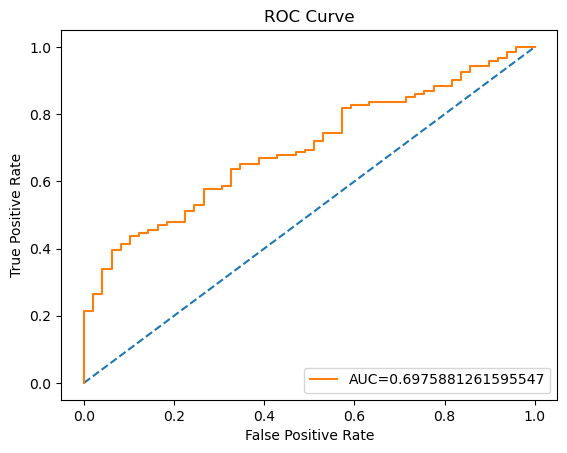

In [85]:
y_pred_proba_X6 = logreg.predict_proba(X6_test)[::,1]
fpr_X6, tpr_X6, _ = roc_curve(y_test,  y_pred_proba_X6)
auc_X6 = roc_auc_score(y_test, y_pred_proba_X6)
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr_X6,tpr_X6,label="AUC="+str(auc_X6))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [86]:
## Model with top 5 features


select_five = SelectKBest(mutual_info_classif, k=5)
print(select_five)

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x121159000>)


In [87]:
select_five.fit(X,y)

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x121159000>)

In [88]:
print(select_five.get_support())

[False False  True  True False  True  True False False  True]


In [89]:
print(select_five.get_feature_names_out())

['TB' 'DB' 'Sgpt' 'Sgot' 'A/G Ratio']


In [90]:
X5 = df1.drop(['Group','AgeGroup'], axis=1)
X5

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
1,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
2,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
3,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
4,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30
...,...,...,...,...,...,...,...,...,...,...
577,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
578,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
579,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
580,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [91]:
X5_drop = [X5.columns[i] for i, x in enumerate(select_five.get_support()) if not x]
X5_drop

['Age', 'Gender', 'Alkphos', 'TP', 'ALB']

In [92]:
X5 = X5.drop((X5_drop), axis = 1)
X5

,TB,DB,Sgpt,Sgot,A/G Ratio
0,10.9,5.5,64,100,0.74
1,7.3,4.1,60,68,0.89
2,1.0,0.4,14,20,1.00
3,3.9,2.0,27,59,0.40
4,1.8,0.7,19,14,1.30
...,...,...,...,...,...
577,0.5,0.1,20,34,0.37
578,0.6,0.1,35,31,1.10
579,0.8,0.2,48,49,1.00
580,1.3,0.5,29,32,1.00


In [93]:
X5_train,X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.3, random_state=1)

In [94]:
logreg.fit(X5_train, y_train)

LogisticRegression(random_state=1)

In [95]:
y_pred_X5 = logreg.predict(X5_test)
y_pred_X5

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred_X5))

Confusion Matrix: 
 [[  2  47]
 [  6 115]]


<Axes: >

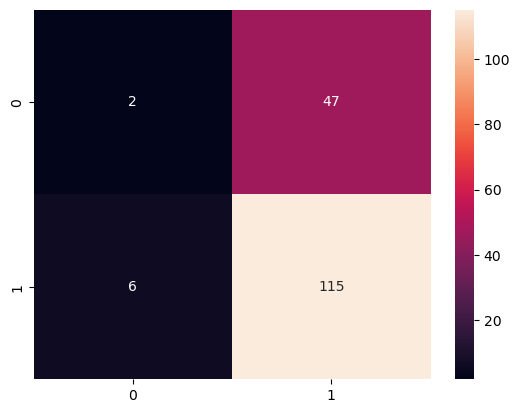

In [97]:
sns.heatmap(confusion_matrix(y_test,y_pred_X5),annot=True, fmt='d')

In [98]:
print('Classification Report: \n', classification_report(y_test,y_pred_X5))

Classification Report: 
               precision    recall  f1-score   support

           0       0.25      0.04      0.07        49
           1       0.71      0.95      0.81       121

    accuracy                           0.69       170
   macro avg       0.48      0.50      0.44       170
weighted avg       0.58      0.69      0.60       170



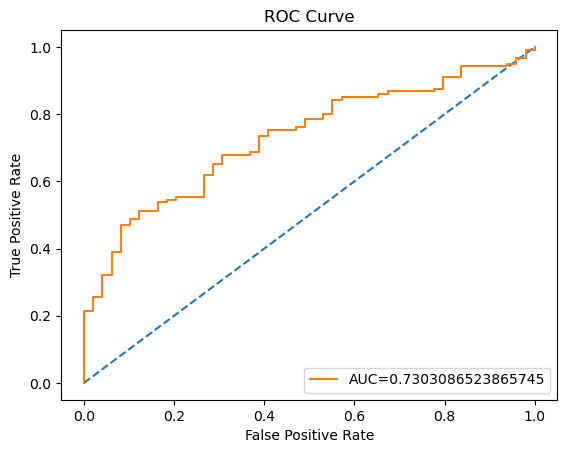

In [99]:
y_pred_proba_X5 = logreg.predict_proba(X5_test)[::,1]
fpr_X5, tpr_X5, _ = roc_curve(y_test,  y_pred_proba_X5)
auc_X5 = roc_auc_score(y_test, y_pred_proba_X5)
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr_X5,tpr_X5,label="AUC="+str(auc_X5))
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [100]:
result = {'Accuracy':[round(accuracy_score(y_test,y_pred),2),round(accuracy_score(y_test,y_pred_X6),2),round(accuracy_score(y_test,y_pred_X5),2)],
         'Precision':[round(precision_score(y_test,y_pred),2),round(precision_score(y_test,y_pred_X6),2),round(precision_score(y_test,y_pred_X5),2)],
         'Recall':[round(recall_score(y_test,y_pred),2),round(recall_score(y_test,y_pred_X6),2),round(recall_score(y_test,y_pred_X5),2)],
         'F1 score':[round(f1_score(y_test,y_pred),2),round(f1_score(y_test,y_pred_X6),2),round(f1_score(y_test,y_pred_X5),2)],
         'AUC':[round(auc,2),round(auc_X6,2),round(auc_X5,2)]}

In [101]:
result

{'Accuracy': [0.7, 0.71, 0.69],
 'Precision': [0.74, 0.73, 0.71],
 'Recall': [0.9, 0.93, 0.95],
 'F1 score': [0.81, 0.82, 0.81],
 'AUC': [0.72, 0.7, 0.73]}

In [102]:
result_df = pd.DataFrame(result, index=['All Features',
                               'Age + TB + DB + Sgpt + Sgot + A/G Ratio',
                               'Age + TB + DB + Sgpt + Sgot'])

In [103]:
result_df

,Accuracy,Precision,Recall,F1 score,AUC
All Features,0.70,0.74,0.90,0.81,0.72
Age + TB + DB + Sgpt + Sgot + A/G Ratio,0.71,0.73,0.93,0.82,0.70
Age + TB + DB + Sgpt + Sgot,0.69,0.71,0.95,0.81,0.73


In [104]:
## conclusion: Logistic Regression model with (Age + TB + DB + Sgpt + Sgot) is the best model (with higher accuracy, F1 scores) compared with other 2 models